In [1]:
#Trying to implemenet a basic version of segmentation and denoising over here

So over here basic pipeline we have is
1. Load the pictures from the desired dataset two diff photos 

2. One if we're starting with psnr we basically need to load the photo into with image_true and image_test(the noised image) (If i have photos how do we decide which is which can prolly reverse and see)
* Basically need to plot a graph of psnr vs noise when we're increasing the amount of noise percentage wise in the pixels 

3. If we're doing SSIM we'll compare two photos in the following order as Bhavesh had requested and deal with them accordingly 
* Dog and cat
* Cat and cat (diff breed)
* Dog and Dog (diff breed)
*Dog and Dog (same breed but diff angle/lighting)
* Cat and Cat (same breed but diff angle/lighting)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import img_as_float, io
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.transform import resize
from skimage.filters import gaussian
import matplotlib.pyplot as plt




In [3]:
# Path to the text file containing the image file names
text_file_path = "/kaggle/input/cats-and-dogs-breeds-classification-oxford-dataset/annotations/annotations/list.txt"

# Initialize empty sets to store unique cat and dog file names
unique_cats = set()
unique_dogs = set()

# Read the text file line by line
with open(text_file_path, "r") as file:
    for line in file:
        # Split the line by spaces
        parts = line.split()
        if len(parts) > 0:
            # Extract the image file name (assuming it's the first part)
            filename = parts[0]
            # Remove any numbering before the first underscore
            name_without_numbering = filename.split("_", 1)[0]
            # Check if the filename starts with a capital letter (cat) or a lowercase letter (dog)
            if name_without_numbering[0].isupper():
                unique_cats.add(name_without_numbering)
            else:
                unique_dogs.add(name_without_numbering)

# Convert the sets to lists and print the unique cat and dog file names
unique_cats_list = list(unique_cats)
unique_dogs_list = list(unique_dogs)

print("Unique cat names list:")
print(unique_cats_list)

print("\nUnique dog names list:")
print(unique_dogs_list)


Unique cat names list:
['Abyssinian', 'Bombay', 'Russian', 'Siamese', 'Bengal', 'British', 'Sphynx', 'Ragdoll', 'Birman', 'Persian', 'Egyptian', 'Maine']

Unique dog names list:
['great', 'scottish', 'yorkshire', 'basset', 'leonberger', 'pug', 'shiba', 'beagle', '#All', '#BREED', 'german', 'miniature', 'american', 'english', '#images', '#ID:', 'staffordshire', 'chihuahua', 'saint', 'newfoundland', 'pomeranian', 'boxer', '#Image', 'keeshond', 'havanese', '#SPECIES:', 'japanese', 'samoyed', 'wheaten']


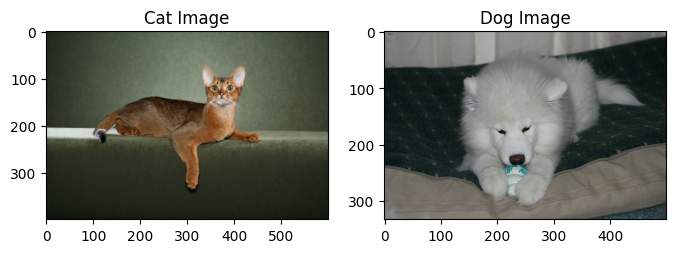

In [4]:
import matplotlib.pyplot as plt
from skimage import img_as_float 

cat_pic_1 = img_as_float(io.imread('/kaggle/input/cats-and-dogs-breeds-classification-oxford-dataset/images/images/Abyssinian_1.jpg'))
dog_pic_1 = img_as_float(io.imread('/kaggle/input/cats-and-dogs-breeds-classification-oxford-dataset/images/images/samoyed_1.jpg'))
cat_pic_1_same = img_as_float(io.imread('/kaggle/input/cats-and-dogs-breeds-classification-oxford-dataset/images/images/Abyssinian_2.jpg'))
dog_pic_1_same = img_as_float(io.imread('/kaggle/input/cats-and-dogs-breeds-classification-oxford-dataset/images/images/samoyed_2.jpg'))
cat_pic_2 = img_as_float(io.imread('/kaggle/input/cats-and-dogs-breeds-classification-oxford-dataset/images/images/Persian_1.jpg'))
dog_pic_2 = img_as_float(io.imread('/kaggle/input/cats-and-dogs-breeds-classification-oxford-dataset/images/images/pug_1.jpg'))



black_pic = img_as_float(io.imread('/kaggle/input/imp-ref-photos/black_pic.png'))
white_pic = img_as_float(io.imread('/kaggle/input/imp-ref-photos/white_pic.jpeg'))
same_dog_a = img_as_float(io.imread('/kaggle/input/imp-ref-photos/same_dog_a.png'))
same_dog_b = img_as_float(io.imread('/kaggle/input/imp-ref-photos/same_dog_b.png'))
same_dog_c = img_as_float(io.imread('/kaggle/input/imp-ref-photos/same_dog_c.png'))
same_dog_d = img_as_float(io.imread('/kaggle/input/imp-ref-photos/same_dog_d.png'))



# Display the images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(cat_pic_1)
plt.title('Cat Image')

plt.subplot(1, 2, 2)
plt.imshow(dog_pic_1)
plt.title('Dog Image')

plt.show()





SSIM_cat_dog: 0.17417516296821217
SSIM_cat_black: 0.06489796302211498
SSIM_cat_white: 0.26641334712021625
SSIM_cat_same: 0.24930483920201796
SSIM_cat_diff: 0.15981570429678488
SSIM_dog_same: 0.09423014962165062
SSIM_dog_diff: 0.043295286190980865


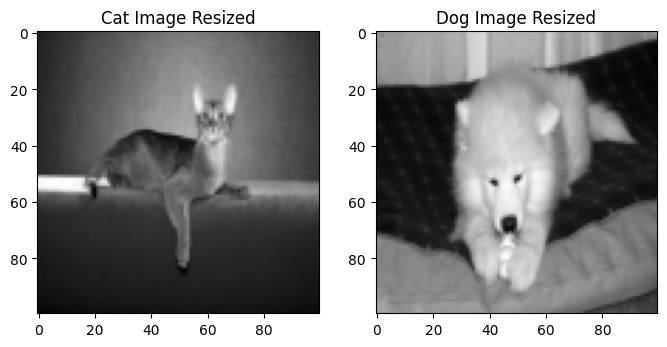

In [5]:


# Function to resize and convert an image to grayscale
def preprocess_image(image, target_shape):
    gray_image = rgb2gray(image)
    resized_image = resize(gray_image, target_shape, anti_aliasing=True)
    return resized_image

# Function to compare two images using SSIM
def compare_images(image1, image2, target_shape):
    image1_preprocessed = preprocess_image(image1, target_shape)
    image2_preprocessed = preprocess_image(image2, target_shape)
    ssim_value = ssim(image1_preprocessed, image2_preprocessed, data_range=image1_preprocessed.max() - image1_preprocessed.min())
    return ssim_value

# Sample usage
if __name__ == "__main__":
    # Load your images here (for example, using plt.imread)
    cat_pic_1 = cat_pic_1
    dog_pic_1 = dog_pic_1

    target_shape = (100, 100)
    ssim_value = compare_images(cat_pic_1, dog_pic_1, target_shape)
    ssim_value2 = compare_images(cat_pic_1,black_pic, target_shape)
    ssim_value3 = compare_images(cat_pic_1,white_pic,target_shape)
    ssim_value4 = compare_images(cat_pic_1,cat_pic_1_same,target_shape)
    ssim_value5 = compare_images(cat_pic_1,cat_pic_2,target_shape)
    ssim_value6 = compare_images(dog_pic_1,dog_pic_1_same,target_shape)
    ssim_value7 = compare_images(dog_pic_1,dog_pic_2,target_shape)
    
    
    
    ssim
    print("SSIM_cat_dog:", ssim_value)
    print("SSIM_cat_black:", ssim_value2)
    print("SSIM_cat_white:", ssim_value3)
    print("SSIM_cat_same:", ssim_value4)
    print("SSIM_cat_diff:", ssim_value5)
    print("SSIM_dog_same:", ssim_value6)
    print("SSIM_dog_diff:", ssim_value7)


    


    # Display the images
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(preprocess_image(cat_pic_1, target_shape), cmap='gray')
    plt.title('Cat Image Resized')
    plt.subplot(1, 2, 2)
    plt.imshow(preprocess_image(dog_pic_1, target_shape), cmap='gray')
    plt.title('Dog Image Resized')
    plt.show()



PSNR experiments start here 


In [6]:


# Function to add Gaussian noise to an image
def add_gaussian_noise(image, noise_level):
    mean = 0
    var = noise_level
    sigma = var ** 0.5
    noisy_image = image + np.random.normal(mean, sigma, image.shape)
    return np.clip(noisy_image, 0, 1)

# Function to denoise an image using a Gaussian filter
def denoise_gaussian(image, sigma=1):
    return gaussian(image, sigma=sigma)

# Function to process the image and generate PSNR results and plot
def process_image(input_image):
    # Preprocess the image
    target_shape = (100, 100)
    input_image_gray = rgb2gray(input_image)
    input_image_resized = resize(input_image_gray, target_shape, anti_aliasing=True)

    # Noise levels and results storage
    noise_levels = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    psnr_results = []
    for i in range (10):
        psnr_row_results = []

        # Add noise, denoise, and calculate metrics
        for noise_level in noise_levels:
            noisy_image = add_gaussian_noise(input_image_resized, noise_level)
            denoised_image = denoise_gaussian(noisy_image, sigma=1)
            psnr_value = psnr(input_image_resized, denoised_image)
            psnr_row_results.append(psnr_value)
        psnr_results.append(psnr_row_results)

    # Convert noise levels to percentages for plotting
    noise_percentages = [str(int(level * 100)) + '%' for level in noise_levels]

    # Plotting PSNR values against noise levels
    plt.figure(figsize=(10, 5))
    
    for row_results in psnr_results:
        plt.plot(noise_percentages, row_results, marker='o', linestyle='--',color = 'lightgray',alpha=0.3)
        
    avg_psnr = np.mean(psnr_results, axis=0)
    plt.plot(noise_percentages, avg_psnr, marker='o',linestyle='--',color='black', label='Average PSNR')
        
        
    plt.title('PSNR values at Different Noise Levels')
    plt.xlabel('Noise Level')
    plt.ylabel('PSNR Value')
    plt.grid(True)
    plt.show()

    return psnr_results

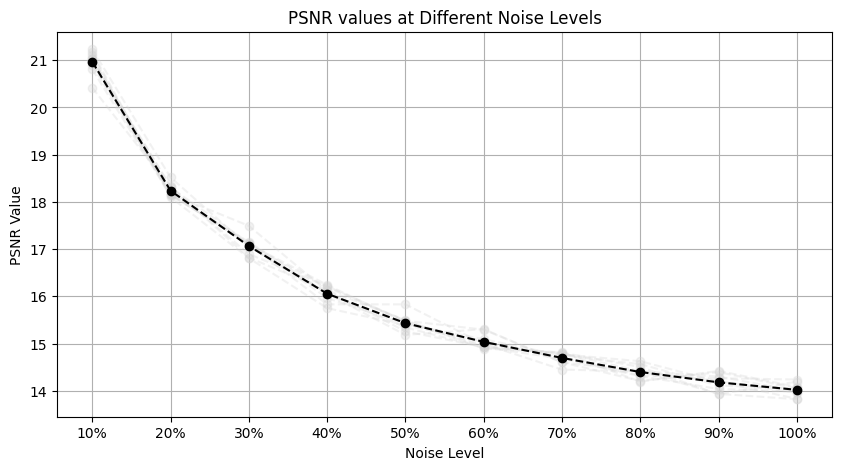

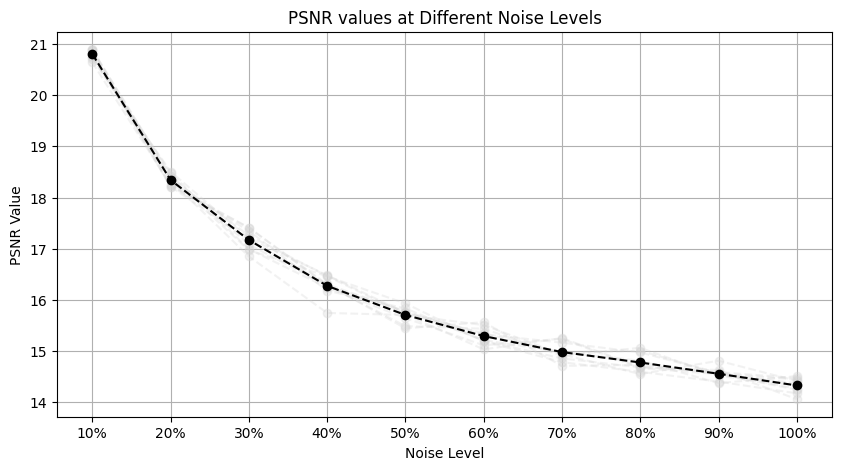

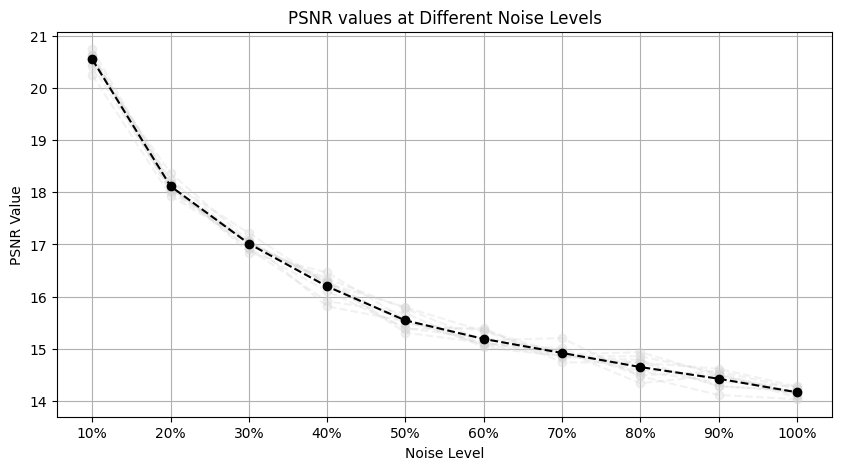

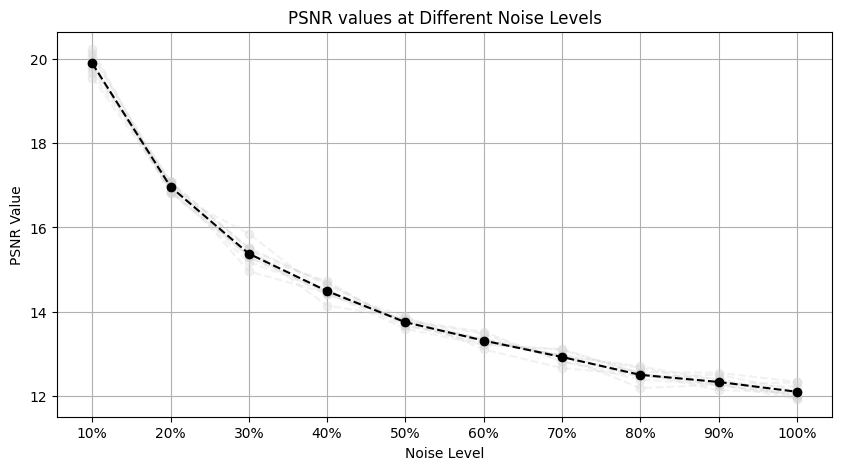

In [7]:


# Process the images and get PSNR results
cat_psnr_results = process_image(cat_pic_1)
dog_psnr_results = process_image(dog_pic_1)
dog_same_psnr_results= process_image(dog_pic_1_same)
cat_same_psnr_results= process_image(cat_pic_1_same)



# 3) **Cell Image testing starts here**

Shape of clean_test_images: (5200, 256, 256)


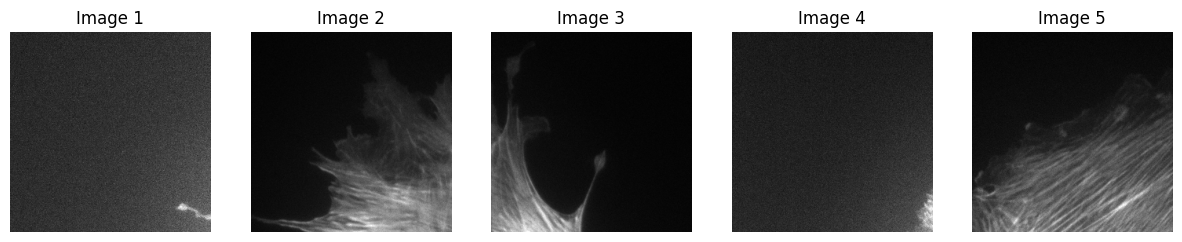

In [8]:

# Load the clean test images
clean_test_images = np.load('/kaggle/input/denoising-data/clean_test.npy')

print("Shape of clean_test_images:", clean_test_images.shape)


# Visualize the first few images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(clean_test_images[i], cmap='gray')
    ax.set_title(f"Image {i+1}")
    ax.axis('off')
plt.show()

Shape of clean_train_images: (41520, 256, 256)


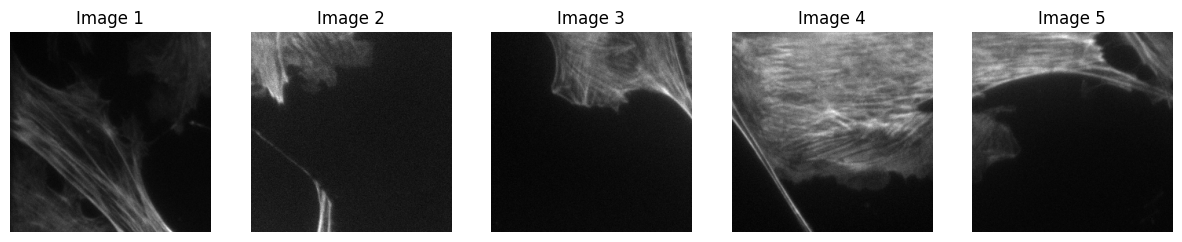

In [9]:
clean_train_images = np.load('/kaggle/input/denoising-data/clean_train.npy')

print("Shape of clean_train_images:", clean_train_images.shape)


# Visualize the first few images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(clean_train_images[i], cmap='gray')
    ax.set_title(f"Image {i+1}")
    ax.axis('off')
plt.show()

Shape of noise_train_images: (41520, 256, 256)


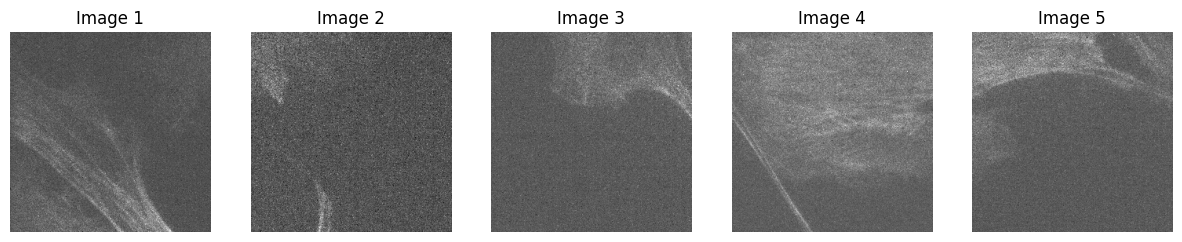

In [10]:
noise_train_images = np.load('/kaggle/input/denoising-data/noise_train.npy')

print("Shape of noise_train_images:", noise_train_images.shape)


# Visualize the first few images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(noise_train_images[i], cmap='gray')
    ax.set_title(f"Image {i+1}")
    ax.axis('off')
plt.show()

Shape of noise_test_images: (41520, 256, 256)


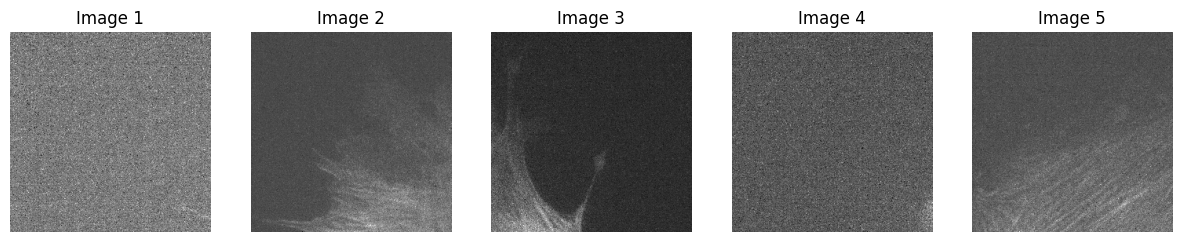

In [11]:
noise_test_images = np.load('/kaggle/input/denoising-data/noise_test.npy')

print("Shape of noise_test_images:", noise_train_images.shape)


# Visualize the first few images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(noise_test_images[i], cmap='gray')
    ax.set_title(f"Image {i+1}")
    ax.axis('off')
plt.show()

In [12]:
noisy_image = noise_train_images[0]
clean_image = clean_train_images[0]

def compare_images(image1, image2, target_shape):
    image1_resized = resize(image1, target_shape, anti_aliasing=True)
    image2_resized = resize(image2, target_shape, anti_aliasing=True)
    ssim_value = ssim(image1_resized, image2_resized, data_range=image2_resized.max() - image2_resized.min())
    return ssim_value


target_shape = (256, 256)  # Assuming your images are 256x256 pixels
ssim_value = compare_images(noisy_image, clean_image, target_shape)
print("SSIM between the first noisy and clean image:", ssim_value)

SSIM between the first noisy and clean image: 0.49163567194733687


In [13]:
noisy_test_image = noise_test_images[0]
clean_test_image = clean_test_images[0]

def compare_images(image1, image2, target_shape):
    image1_resized = resize(image1, target_shape, anti_aliasing=True)
    image2_resized = resize(image2, target_shape, anti_aliasing=True)
    ssim_value = ssim(image1_resized, image2_resized, data_range=image2_resized.max() - image2_resized.min())
    return ssim_value


target_shape = (256, 256)  # Assuming your images are 256x256 pixels
ssim_value = compare_images(noisy_test_image, clean_test_image, target_shape)
print("SSIM between the first noisy and clean image:", ssim_value)



SSIM between the first noisy and clean image: 0.4396179090453914
